In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn import metrics


In [2]:
def calculate_accuracy(threshold, dist, actual_issame):
    # If distance is less than threshold, then prediction is set to True
    predict_issame = np.less(dist, threshold)

    true_positives = np.sum(np.logical_and(predict_issame, actual_issame))
    false_positives = np.sum(np.logical_and(predict_issame, np.logical_not(actual_issame)))
    true_negatives = np.sum(np.logical_and(np.logical_not(predict_issame), np.logical_not(actual_issame)))
    false_negatives = np.sum(np.logical_and(np.logical_not(predict_issame), actual_issame))

    # For dealing with Divide By Zero exception
    true_positive_rate = 0 if (true_positives + false_negatives == 0) else float(true_positives) / float(
        true_positives + false_negatives)

    false_positive_rate = 0 if (false_positives + true_negatives == 0) else float(false_positives) / float(
        false_positives + true_negatives)

    precision = 0 if (true_positives + false_positives) == 0 else float(true_positives) / float(
        true_positives + false_positives)

    recall = 0 if (true_positives + false_negatives) == 0 else float(true_positives) / float(
        true_positives + false_negatives)

    accuracy = float(true_positives + true_negatives) / dist.size

    #     return true_positive_rate, false_positive_rate, precision, recall, accuracy
    return [true_positive_rate, false_positive_rate, accuracy]

    return acc
def plot_cf_matrix(actual, pred):
    cf = metrics.confusion_matrix(actual, pred)
    cf = metrics.ConfusionMatrixDisplay(cf, display_labels = ['False', 'True']).plot()
    return cf
def cal_acc_2_df(df1: pd.DataFrame(), df2: pd.DataFrame()):
    df1_acc = calculate_accuracy(df1['threshold'], df1['distance'], df1['label'])
    df2_acc = calculate_accuracy(df2['threshold'], df2['distance'], df2['label'])

    print(f'Accuracy of similarity of {df1.model.value_counts().index.item()}: {round(df1_acc, 4)}')
    print(f'Accuracy of similarity of {df2.model.value_counts().index.item()}: {round(df2_acc, 4)}')
    return df1_acc, df2_acc

In [3]:
VGG_Face1_5_fold = pd.read_csv('./VGG-Face1_5_fold.csv')
VGG_Face2_5_fold = pd.read_csv('./VGG-Face2_5_fold.csv')
VGG_Face3_5_fold = pd.read_csv('./VGG-Face3.0_5_fold.csv')
VGG_Face4_5_fold = pd.read_csv('./VGG-Face4.0_5_fold.csv')
VGG_Face5_5_fold = pd.read_csv('./VGG-Face5_5_fold.csv')

In [36]:
vgg_face = pd.concat([VGG_Face1_5_fold, VGG_Face2_5_fold, VGG_Face3_5_fold, VGG_Face4_5_fold, VGG_Face5_5_fold])
vgg_face = vgg_face.drop(['Unnamed: 0'], axis=1)
calculate_accuracy(vgg_face['threshold'], vgg_face['distance'],vgg_face['label'])

[0.9013761467889908, 0.18830275229357799, 0.8565366972477064]

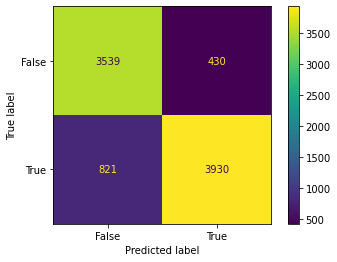

In [37]:
plot_cf_matrix(vgg_face['verified'],vgg_face['label'])

In [38]:
facenet1_same = pd.read_csv('./Facenet1_5_fold.csv')
facenet2_same = pd.read_csv('./Facenet2_5_fold.csv')
facenet3_same = pd.read_csv('./Facenet3_5_fold.csv')
facenet4_same = pd.read_csv('./Facenet4_5_fold.csv')
facenet5_same = pd.read_csv('./Facenet5_5_fold.csv')

In [39]:
facenet_same = pd.concat([facenet1_same, facenet2_same, facenet3_same, facenet4_same, facenet5_same])
facenet_same = facenet_same.drop(['Unnamed: 0'], axis=1)
calculate_accuracy(facenet_same['threshold'], facenet_same['distance'],facenet_same['label'])

[0.36559633027522936, 0.04151376146788991, 0.6620412844036697]

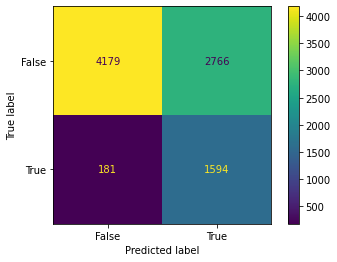

In [40]:
plot_cf_matrix(facenet_same['verified'],facenet_same['label'])

In [5]:
facenet512_1_same = pd.read_csv('./Facenet5121_5_fold.csv')
facenet512_2_same = pd.read_csv('./Facenet5122_5_fold.csv')
facenet512_3_same = pd.read_csv('./Facenet5123_5_fold.csv')
facenet512_4_same = pd.read_csv('./Facenet5124_5_fold.csv')
facenet512_5_same = pd.read_csv('./Facenet5125_5_fold.csv')
facenet512_same = pd.concat([facenet512_1_same,facenet512_2_same, facenet512_3_same, facenet512_4_same, facenet512_5_same], axis = 0)
facenet512_same

,Unnamed: 0,verified,distance,threshold,model,detector_backend,similarity_metric,identity1,identity2,label,time
0,0,False,1.176590,1.04,Facenet512,opencv,euclidean_l2,183664,183664,True,6.28
1,1,False,1.138289,1.04,Facenet512,opencv,euclidean_l2,110034,175846,False,0.20
2,2,False,1.161977,1.04,Facenet512,opencv,euclidean_l2,110034,184341,False,0.19
3,3,False,1.317254,1.04,Facenet512,opencv,euclidean_l2,198030,172865,False,0.23
4,4,False,1.359445,1.04,Facenet512,opencv,euclidean_l2,121502,115235,False,0.21
...,...,...,...,...,...,...,...,...,...,...,...
1739,1739,False,1.110126,1.04,Facenet512,opencv,euclidean_l2,5751,175989,False,0.25
1740,1740,False,1.195264,1.04,Facenet512,opencv,euclidean_l2,5751,196589,False,0.25
1741,1741,False,1.124571,1.04,Facenet512,opencv,euclidean_l2,105906,105906,True,0.26
1742,1742,False,1.133729,1.04,Facenet512,opencv,euclidean_l2,105182,195936,False,0.24


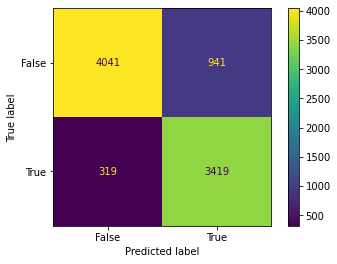

In [6]:
plot_cf_matrix(facenet512_same['verified'],facenet512_same['label'])